Load the Dataset
python

In [4]:
import pandas as pd
# Load and display the first few rows of the new CSV file to understand the data structure
new_csv_file_path = 'icc_wc_23_bat.csv'
data = pd.read_csv(new_csv_file_path)

data.head()


,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


Preprocess the Data

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
numerical_features = ['runs', 'balls', 'minutes', '4s', '6s', 'strike_rate']
data_for_clustering = data[numerical_features]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


Determine the Optimal Number of Clusters

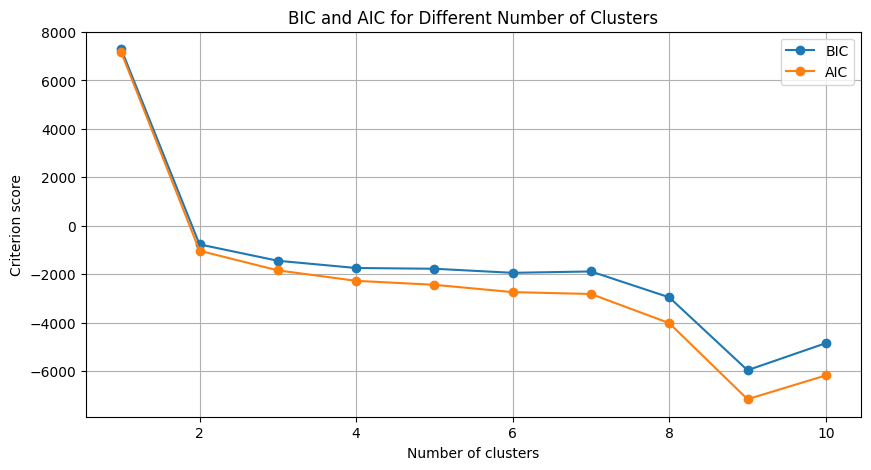

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using BIC and AIC
n_clusters = np.arange(1, 11)  # Considering 1 to 10 clusters
bics = []
aics = []

for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(scaled_data)
    bics.append(gmm.bic(scaled_data))
    aics.append(gmm.aic(scaled_data))

# Plotting the BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion score')
plt.legend()
plt.title('BIC and AIC for Different Number of Clusters')
plt.grid(True)
plt.show()


Fit the Gaussian Mixture Model

In [7]:
# Fit the GMM using the optimal number of clusters (replace 'n_optimal' with the chosen number)
n_optimal = 3  # Example, replace with the number identified from BIC/AIC plot
gmm = GaussianMixture(n_components=n_optimal, random_state=0)
gmm.fit(scaled_data)

# Predict cluster labels
cluster_labels = gmm.predict(scaled_data)


Analyze and Visualize the Results

In [8]:
# Analyze the results
result_df = pd.DataFrame(scaled_data, columns=numerical_features)
result_df['cluster'] = cluster_labels

# Display the first few rows of the result
result_df.head()

# Optional: Visualize the clusters if the data is suitable (e.g., using PCA for dimensionality reduction)


,runs,balls,minutes,4s,6s,strike_rate,cluster
0,-0.734610,-0.948445,-0.964786,-0.495460,-0.494032,2.208674,2
1,2.103998,2.202503,2.246420,2.682892,0.848447,0.324601,1
2,1.974971,2.272524,2.318313,2.682892,-0.494032,0.204208,1
3,1.781429,0.942124,1.000280,0.140211,3.533406,1.199187,1
4,-0.186242,-0.353266,-0.197931,-0.177624,-0.494032,0.522805,0


 Further analyze the data after applying the Gaussian Mixture Model (GMM)

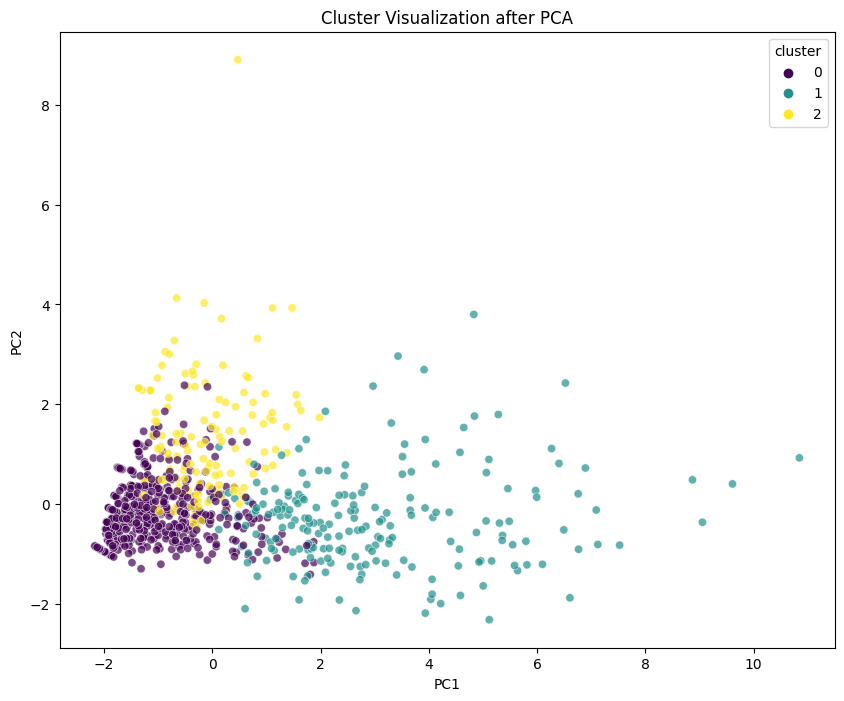

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id,cluster
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0,2
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0,1
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0,1
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0,1
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0,0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting and scaling the numerical features for clustering
numerical_features = ['runs', 'balls', 'minutes', '4s', '6s', 'strike_rate']
data_for_clustering = data[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Fit the GMM (assuming 3 clusters)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm.fit(scaled_data)
cluster_labels = gmm.predict(scaled_data)

# Adding cluster labels to the original dataset for interpretation
analysis_df = data.copy()
analysis_df['cluster'] = cluster_labels

# Visualizing Clusters: Using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Cluster Visualization after PCA')
plt.show()

# Displaying the first few rows of the analysis dataframe for context interpretation
analysis_df.head()
